## Part 3 - Exploratory Data Analysis

I will be exploring the cleaned data in this notebook.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Importing cleaned datasets
marriage = pd.read_csv('../datasets/marriage_cleaned.csv')
relationship = pd.read_csv('../datasets/relationship_cleaned.csv')
combined = pd.read_csv('../datasets/combined.csv')

### Average Character Count

I will be exploring the average character count for both the title and the text in the posts.

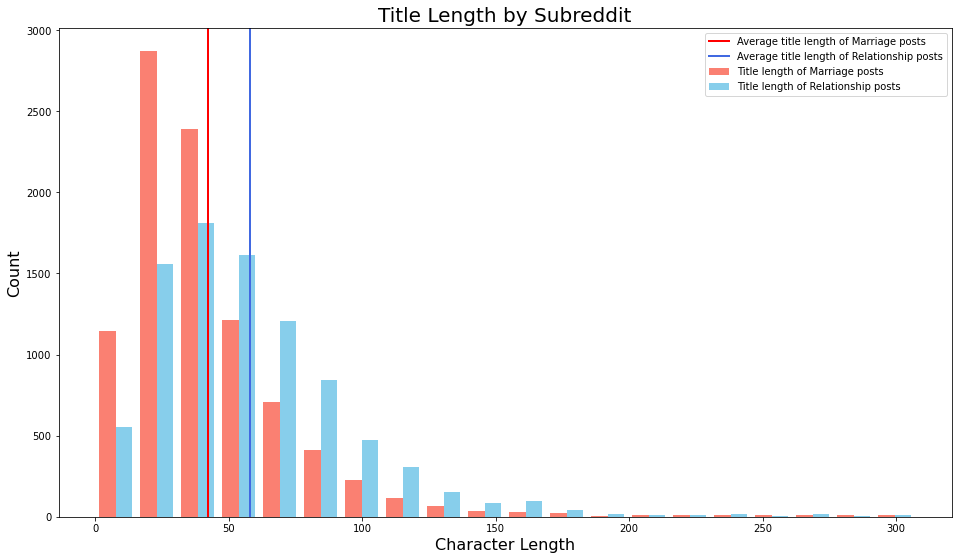

In [3]:
plt.figure(figsize=(16, 9))

plt.hist(
    [marriage['title_length'],
    relationship['title_length']],
    bins=20,
    color=['salmon', 'skyblue']
)

plt.axvline(
    marriage['title_length'].mean(),
    linewidth=2,
    color='red'
)

plt.axvline(
    relationship['title_length'].mean(),
    linewidth=2,
    color='royalblue'
)

plt.legend([
    'Average title length of Marriage posts',
    'Average title length of Relationship posts',
    'Title length of Marriage posts',
    'Title length of Relationship posts'])

plt.title('Title Length by Subreddit', fontsize = 20)

plt.xlabel('Character Length', fontsize = 16);
plt.ylabel('Count', fontsize = 16);


Both marriage posts and relationship posts are right skewed. However, it can be seen that on average, the title length of marriage posts are shorter than the title length of relationship posts.

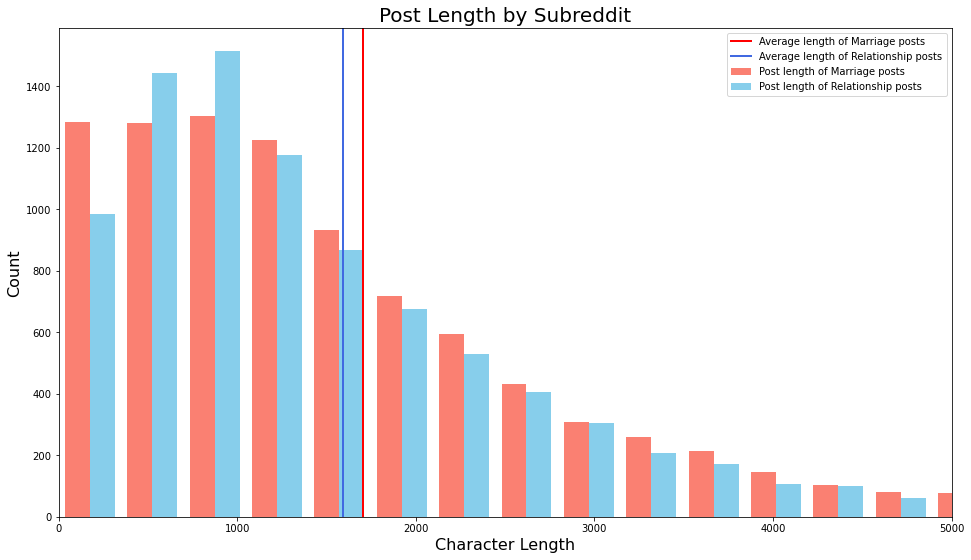

In [4]:
plt.figure(figsize=(16, 9))

plt.hist(
    [marriage['text_length'],
    relationship['text_length']],
    bins=100,
    color=['salmon', 'skyblue']
)

plt.axvline(
    marriage['text_length'].mean(),
    linewidth=2,
    color='red'
)

plt.axvline(
    relationship['text_length'].mean(),
    linewidth=2,
    color='royalblue'
)

plt.legend([
    'Average length of Marriage posts',
    'Average length of Relationship posts',
    'Post length of Marriage posts',
    'Post length of Relationship posts'])

plt.title('Post Length by Subreddit', fontsize = 20)

plt.xlabel('Character Length', fontsize = 16);
plt.ylabel('Count', fontsize = 16);

plt.xlim(0, 5000);



While similar to the title length, marriage posts and relationship posts are right skewed. However, on average, the length of marriage posts are shorter than the title length of relationship posts.

I believe that it is due to married couples having to add in much more context for other redditors to understand their circumstances.

### Plotting most frequently seen words 

I will be using countvectorizer to perform EDA on the most frequently seen words in the two datasets. To prevent some of the more obvious words from exposing which dataset it belongs to, I will add them into the stop words list.

In [5]:
# Creating a list of obvious stop words.
forbidden_words = [
    'boyfriend', 'girlfriend', 'gf', 'bf',
    'husband', 'husbands', 'wife', 'wives', 'spouse', 'spouses', 'hubby', 'dh',
    'marriage', 'marriages', 'marriageadvice', 'married', 'marital', 'relationship',
    # adding other words which were unwanted
    'tl', 'dr', 'tl;dr', 'tldr', 'amp x200b', 'amp', 'x200b', 'www', 'https'
]



In [6]:
# Creating a variable for standard 'english' stopwords

custom_stop_words = stopwords.words('english')

In [7]:
custom_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# Adding the list of obvious stopwords to create a custom stop word list
custom_stop_words.extend(forbidden_words)

In [9]:
custom_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# Create a dataframe for the stop words
custom_stop = pd.DataFrame({'words': custom_stop_words})

After creating a list of custom stop words, I will convert it to a csv file so that it can be standardised across all other notebooks.

In [11]:
# Create a csv file to standardise the stop words across all notebooks
custom_stop.to_csv('../datasets/custom_stop_words.csv', index=False)

Now I will be plotting the words to explore the most frequently seen words

In [12]:
# Create a function to plot frequently seen words
def plot_top_words(df, column, color, title=None, ngram=1, top_n=20):
    
    # Instantiate countvectorizer
    cvec = CountVectorizer(
        stop_words=custom_stop_words,
        ngram_range=(ngram , ngram)
    )
    
    # Fit and transform columns
    words_cvec = cvec.fit_transform(df[column])
    
    # Create a dense Dataframe
    words_cvec_df = pd.DataFrame(words_cvec.todense(), columns=cvec.get_feature_names_out())
    
    # Sort dataframe based on highest number of counts.
    top_words = words_cvec_df.sum().sort_values(ascending=False).head(top_n)
   
    plt.figure(figsize=(16,9))

    plt.barh(
    top_words.index,
    top_words.values,
    color=color
    )
    plt.title(title, fontsize = 20)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=16)
    ;
    

* Note that outside EDA had left to inconclusive words and bigrams hence I did not use the lem_all_text column.

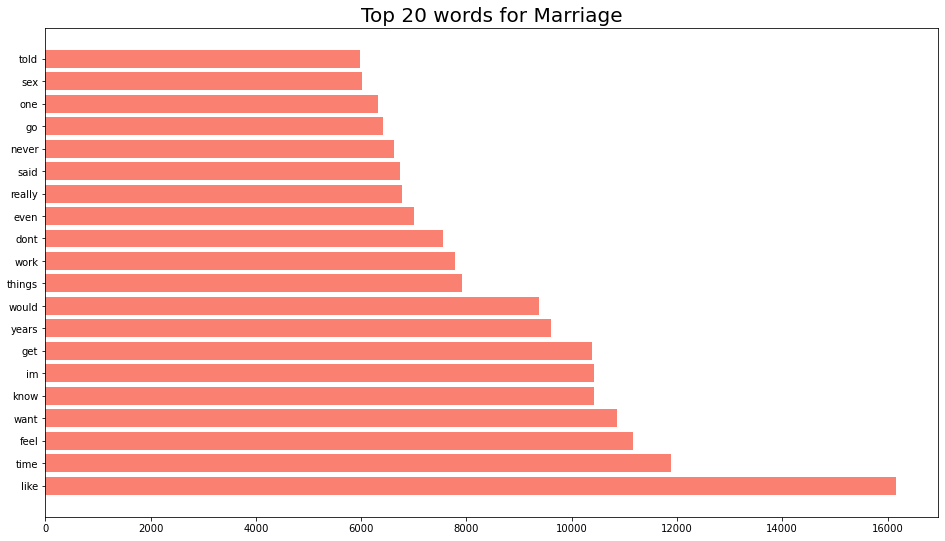

In [13]:
plot_top_words(marriage, 'all_text', 'salmon', title='Top 20 words for Marriage')

Most of the words seen are actually relatively common. However, 1 word stood out, "sex" is the most unsual word identified here.

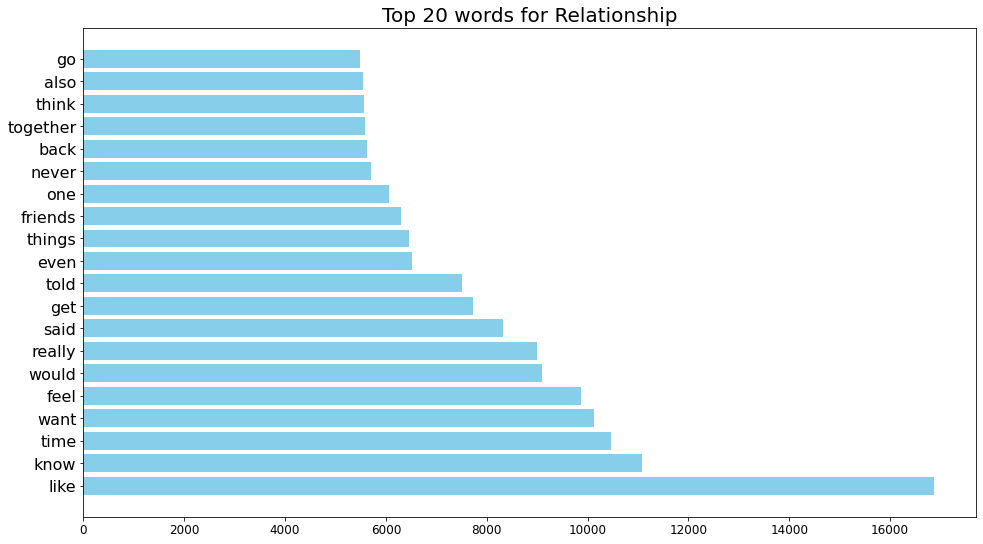

In [14]:
plot_top_words(relationship, 'all_text', 'skyblue', title='Top 20 words for Relationship')

The words here are even more inconclusive as they are also mainly common words. 

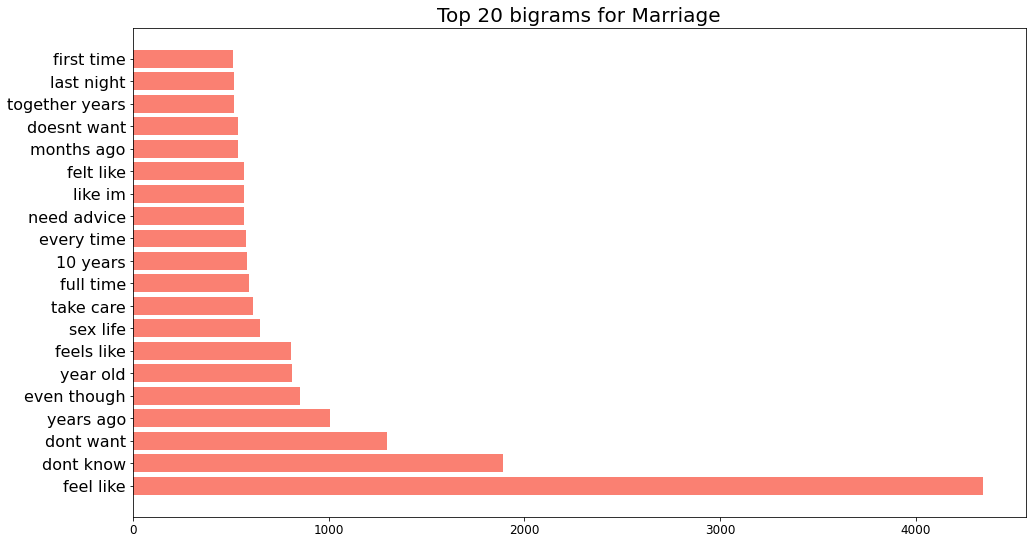

In [15]:
plot_top_words(marriage, 'all_text', 'salmon', title='Top 20 bigrams for Marriage', ngram=2)

Looking at bigrams, there are clearer indications of posts for marriage, such as "take care" and "sex life".

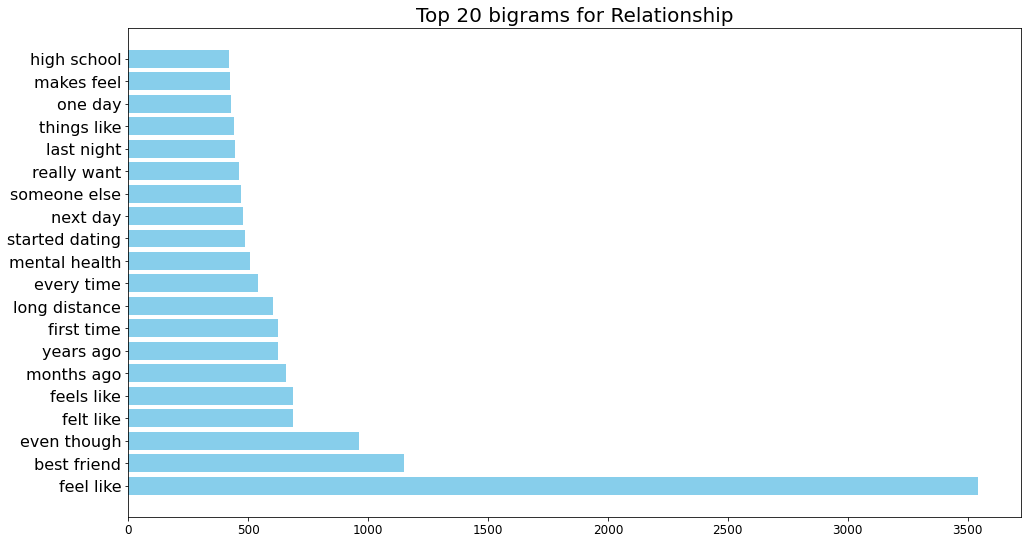

In [16]:
plot_top_words(relationship, 'all_text', 'skyblue', title='Top 20 bigrams for Relationship', ngram=2)

Similarly for relationships, there are clearer indications of posts for relationships such as "long distance" and "started dating". 

Furthermore, there are some other interesting features such as "mental health" and "best friend" which are worth further exploring as well.

It can also be gleamed that the relationship posts are made by younger redditors which is indicated by "high school".

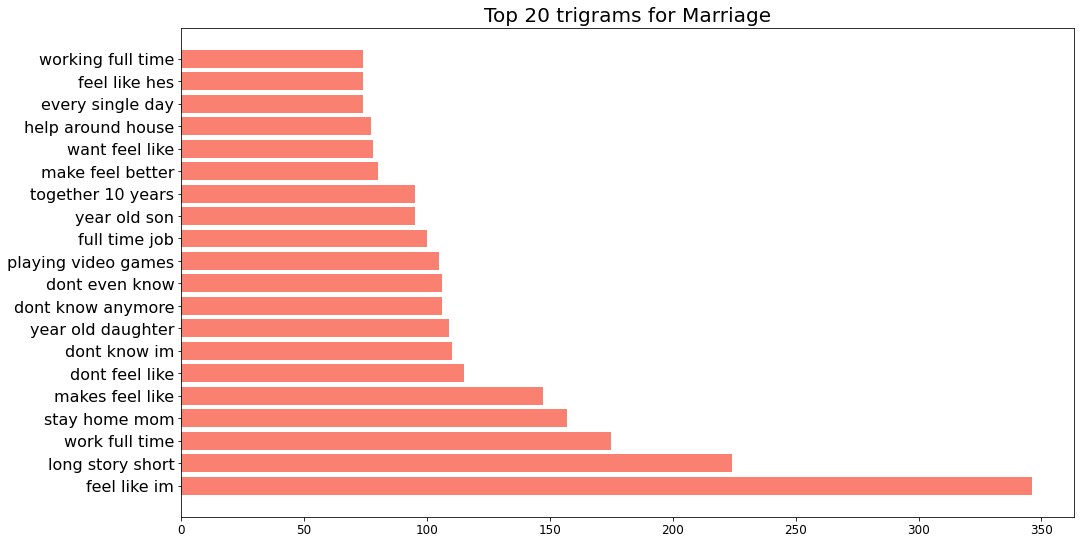

In [17]:
plot_top_words(marriage, 'all_text', 'salmon', title='Top 20 trigrams for Marriage', ngram=3)

Looking at trigrams, I can see that there are some issues which are very prevalent in marriage posts. Posts such as "stay home mum", "playing video games", "help around house" can indicate issues within a marriage. For these posts, they will be very useful for collection into the FAQ.

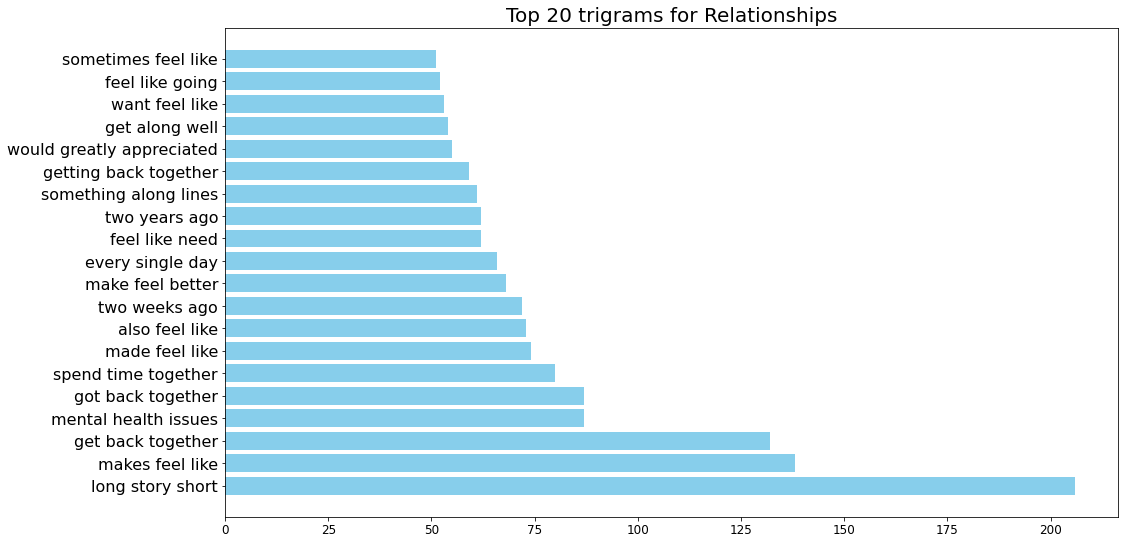

In [18]:
plot_top_words(relationship, 'all_text', 'skyblue', title='Top 20 trigrams for Relationships', ngram=3)

For relationships, "mental health issues" is still appearing hence it should be worth investigating further. 

Many of the other trigrams are a variation of "get back together" and this could also be indicative of concilliation of the couples. Having the reasons as to why couples reconcilliate will also be useful for the FAQ.

### Sentiment Analysis

I will be using sentiment analysis here to check on the sentiments of the posts and to classify their orientation. This may be useful for the addition into the FAQ as well.

In [19]:
# Instantiate sentiment analyser
sent = SentimentIntensityAnalyzer()

In [20]:
# Add compound scores to marriage dataset
marriage['sent_score'] = marriage['all_text'].map(lambda x: sent.polarity_scores(x)['compound'])

In [21]:
# Add compound scores to relationship dataset
relationship['sent_score'] = relationship['all_text'].map(lambda x: sent.polarity_scores(x)['compound'])

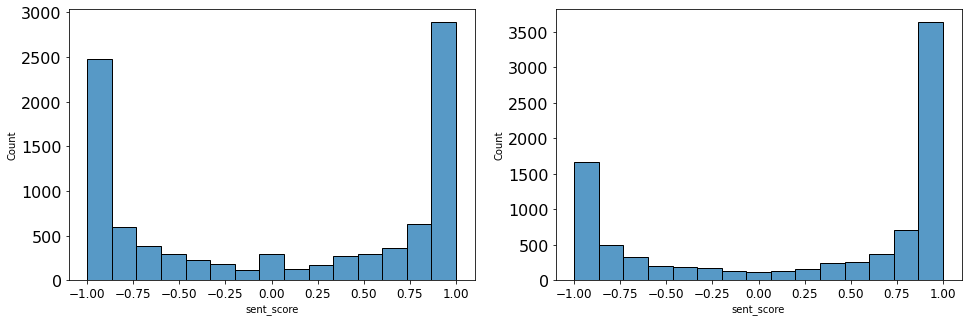

In [22]:
# Plotting the compound score for both datasets.
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(marriage['sent_score']);

plt.subplot(1, 2, 2)
sns.histplot(relationship['sent_score']);

The sentiment scores for both relationship and marriage is bimodal peaking near both extremes.

In [23]:
# Checking the top 5 posts
marriage.sort_values(by='sent_score', ascending=False).head(5)

,selftext,title,created_utc,all_text,text_length,title_length,all_text_length,is_marriage,lem_all_text,sent_score
3647,"By Tim Weissman, Ph.D.\n\nThe most common ques...",7 Secrets to a Lifelong Happy Marriage,1623724582,7 Secrets to a Lifelong Happy Marriage By Tim ...,18980,38,19019,1,7 Secrets Lifelong Happy Marriage By Tim Weiss...,1.0000
3893,tl;dr: My wife (29F) and I (32M) are having im...,My wife (29F) and I (32M) are deeply strugglin...,1622129361,My wife (29F) and I (32M) are deeply strugglin...,12999,91,13091,1,My wife (29F) I (32M) deeply struggling commun...,0.9999
8749,&amp;#x200B;\n\n[ ](https://i.redd.it/t50b86wf...,4 Tips on maintaining a strong marriage within...,1548776662,4 Tips on maintaining a strong marriage within...,9459,56,9516,1,4 Tips maintaining strong marriage home &amp;#...,0.9998
9058,"**Many women, just like you, have the feeling ...",How do I make him commit fully to me?,1533115477,How do I make him commit fully to me? **Many w...,8391,37,8429,1,"How I make commit fully me? **Many women, just...",0.9998
1379,"Hello random internet strangers,\n\nI am looki...",Am I too Forgiving or is my Husband a Master M...,1638602948,Am I too Forgiving or is my Husband a Master M...,23887,57,23945,1,Am I Forgiving Husband Master Manipulator? Hel...,0.9998


Upon further investigation, there seems to be something wrong with the sentiment analyser. The sent_score for such posts are highly inaccurate.

In [24]:
# Check one suspicious post
marriage['all_text'][3893]

"My wife (29F) and I (32M) are deeply struggling with communication problems in our marriage tl;dr: My wife (29F) and I (32M) are having immense problems rooted in communication.\n\nWe have been together for around 4  years, and married for 3.\n\nTo begin with some background: Our relationship started out absolutely amazing, and it continues to be so in many ways. Its uncomfortable for me to say something self-serving or conceited like this, but I think in a lot of ways we are sort of a couple goals marriage when out with other couples, e.g. my wifes friends. We are affectionate, caring, supportive, goofy, interactive, and carry good energy; we really glow when together. When we travel or go in little adventures together, its always wonderful for us both, and our bond is strengthened by the time we share. Were like pigs in mud when spending time together doing novel, fun things. We really vibrate on the same wavelength in many ways, are the yin/yang to each other, and I know theres mas

Phrases such as these may confuse the analyser:

1) "deeply struggling with communication problems in our marriage"

2) "This has gotten to the point where I sometimes feel suicidal; it feels as if my efforts to be there for her and make us stronger are just meaningless, and I just am clueless at how to proceed."

3) "My wife is a loving, caring, wonderful person, and she means the world to me."

As such, the sentiment analyser seems to be not a good indicator.

I will also check the top 5 posts for relationships

In [29]:
# Checking the top 5 posts for relationships
relationship.sort_values(by='sent_score', ascending=False).head(5)

,selftext,title,created_utc,all_text,text_length,title_length,all_text_length,is_marriage,lem_all_text,sent_score
4741,So I (F21) met my friend (M26) through work i...,My friend(M26) isn't happy that I (F21) like h...,1647909222,My friend(M26) isn't happy that I (F21) like h...,4819,66,4886,0,My friend(M26) isn't happy I (F21) like best f...,0.9999
7604,"For some background, I've been in this fairly ...",I convinced myself that I liked a dear friend ...,1647798990,I convinced myself that I liked a dear friend ...,4267,142,4410,0,I convinced I liked dear friend told mutual fr...,0.9998
3112,I (22M) have been in a relationship with my GF...,In a long term relationship but cannot stop th...,1647981652,In a long term relationship but cannot stop th...,7291,71,7363,0,In long term relationship stop thinking girl I...,0.9998
7507,I (18m) and my bf (18) just broke up this past...,I suppose I’m just looking for advice,1647802007,I suppose I’m just looking for advice I (18m) ...,8336,37,8374,0,I suppose I’m just looking advice I (18m) bf (...,0.9998
8145,"Hi everyone, this is my first reddit post so i...",What do i do about my LYING boyfriend? He has ...,1647776892,What do i do about my LYING boyfriend? He has ...,13568,75,13644,0,What LYING boyfriend? He told lie 5 times. Hi ...,0.9998


In [34]:
relationship['all_text'][7507]

'I suppose I’m just looking for advice I (18m) and my bf (18) just broke up this past Tuesday. It is all very confusing, here’s the story.\n\nSo my boyfriend and I have been talking since early January. We started actually dating and going out in early February. Our relationship evolved quickly, we are very compatible in all aspects. Around two weeks in he asked to be exclusive to which I agreed. When we were still “online dating” as we hadn’t met yet, it came out through a friend that he was talking to him and he had met him on Tinder. However we worked through this as he genuinely showed he cared and we were both just insecure and nervous it wouldn’t work. He showed in every way he regretted it and worked hard for weeks to prove it. This issue never reoccurred but it valuable to the story. We started going out and it was amazing. We connected so well and it was always so fun. Whether it was going out, just hanging out, sex, deep discussions, etc. I became friends with his friends. Th

Some phrases from this post will also confuse the sentiment analyzer:

1) "just broke up this past Tuesday"

2) "he genuinely showed he cared and we were both just insecure and nervous it wouldn’t work"

3) "I ended up talking about how much I still loved him and just about how perfect our relationship was and specific moments that were so sweet"

This post is quite obvious to a human reader that it is not a positive post yet it was given a high compound score. This seems to affirm that sentiment analyzer is not very useful in this context.

Now I will analyse the negative scores.

In [36]:
marriage.sort_values(by='sent_score', ascending=True).head(5)

,selftext,title,created_utc,all_text,text_length,title_length,all_text_length,is_marriage,lem_all_text,sent_score
8283,Today is my partner birthday but I don't reall...,A huge hole inside me,1563402156,A huge hole inside me Today is my partner birt...,10728,21,10750,1,A huge hole inside Today partner birthday I do...,-0.9997
8995,I'm in a bad situation with my husband right n...,Is there any salvaging this marriage at all????,1537286793,Is there any salvaging this marriage at all???...,4843,47,4891,1,Is salvaging marriage all???? I'm bad situatio...,-0.9997
211,TW: CPTSD ; suicidal ideation; abuse; emotiona...,Update/response to previous post,1646669973,Update/response to previous post TW: CPTSD ; s...,10961,32,10994,1,Update/response previous post TW: CPTSD ; suic...,-0.9997
4617,My wife and I have been married since our earl...,Wife is hinting at divorce after us not being ...,1615498321,Wife is hinting at divorce after us not being ...,7011,67,7079,1,Wife hinting divorce able pregnant. My wife I ...,-0.9997
9085,"This is long, please bare with me. I feel like...",My husband doesnt defend my honor.,1530925086,My husband doesnt defend my honor. This is lon...,10905,34,10940,1,"My husband doesnt defend honor. This long, bar...",-0.9996


Surprisingly, the negative scores for the sentiment analyser seems to be quite accurate

In [37]:
relationship.sort_values(by='sent_score', ascending=True).head(5)

,selftext,title,created_utc,all_text,text_length,title_length,all_text_length,is_marriage,lem_all_text,sent_score
1948,"Sorry that this is so long, I have been bottli...",I hate my mother and I feel bad about it.,1648030733,I hate my mother and I feel bad about it. Sorr...,8602,41,8644,0,"I hate mother I feel bad it. Sorry long, I bot...",-0.9998
5499,We were dating for 2.5 years. Talked about ha...,My (34F) now ex-bf (27M) has had mental health...,1647882666,My (34F) now ex-bf (27M) has had mental health...,13132,135,13268,0,My (34F) ex-bf (27M) mental health issues/depr...,-0.9998
2552,*I will refer to my moms husband as Tom to mak...,Problems between my mom and her Husband,1648001537,Problems between my mom and her Husband *I wil...,9590,39,9630,0,Problems mom Husband *I refer mom husband Tom ...,-0.9997
344,My mom and my aunt got drunk after riding on a...,I think my aunt hates me. Is there anything I ...,1648092062,I think my aunt hates me. Is there anything I ...,4594,53,4648,0,I think aunt hate me. Is I do? My mom aunt got...,-0.9996
1067,"Oof, this is a one big gaslight move. My siste...",My sister accused me of giving her covid-19,1648067811,My sister accused me of giving her covid-19 Oo...,3699,43,3743,0,"My sister accused giving covid-19 Oof, big gas...",-0.9993


Similarly, for relationships the negative scores for the sentiment analyser seems to be quite accurate here.

While the sentiment analyser is able to accurately predict the sentiment for negative posts, it is wildly inaccurate for the positive posts and as such I will not be using sentiment analyzer for the model.

### Proceed to the next notebook for Modelling